In [1]:
# import statements
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# plt.imshow(x_test[0], cmap='gray')
# plt.show()
# y_test[0]
x_train_resized = np.zeros((x_train.shape[0], 32, 32, 3), dtype=np.float32)
for i in range(x_train.shape[0]):
    img = np.expand_dims(x_train[i], axis=-1)
    img = array_to_img(img, scale=False).resize((32, 32))
    x_train_resized[i] = img_to_array(img)

x_test_resized = np.zeros((x_test.shape[0], 32, 32, 3), dtype=np.float32)
for i in range(x_test.shape[0]):
    img = np.expand_dims(x_test[i], axis=-1)
    img = array_to_img(img, scale=False).resize((32, 32))
    x_test_resized[i] = img_to_array(img)

# Convert the images to float32 and scale the pixel values to [0, 1]
x_train_preprocessed = x_train_resized.astype(np.float32) / 255.0
x_test_preprocessed = x_test_resized.astype(np.float32) / 255.0

# Convert the labels to int32
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# Load the Resnet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# model.summary()
# Freeze the pre-trained layers to prevent them from being trained again
for layer in base_model.layers:
    layer.trainable = False
# Add custom classification layers on top of the pre-trained model
final_model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
])
print(final_model.summary)


94765736/94765736 [==============================] - 3s 0us/step
<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7a7bf06a7d90>>


In [ ]:
# Compile the model

final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=final_model.fit(x_train_preprocessed, y_train, epochs=99,batch_size=32)
#saving model
final_model.save('/content/drive/MyDrive/Mnist Digit Recogination/model(resnet50).hdf5')



Epoch 1/99
1875/1875 [==============================] - 26s 12ms/step - loss: 0.3183 - accuracy: 0.8952
Epoch 2/99
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2601 - accuracy: 0.9158
Epoch 3/99
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2355 - accuracy: 0.9237
Epoch 4/99
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2177 - accuracy: 0.9294
Epoch 5/99
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2035 - accuracy: 0.9337
Epoch 6/99
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1898 - accuracy: 0.9380
Epoch 7/99
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1844 - accuracy: 0.9404
Epoch 8/99
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1761 - accuracy: 0.9432
Epoch 9/99
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1705 - accuracy: 0.9449
Epoch 10/99
1875/1875 [==============================] - 20s 11m

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = final_model.evaluate(x_test_preprocessed, y_test)
print('TESTING DATA LOSS & ACC.  ------------> loss: %.3f, acc: %.3f' % (test_loss, test_acc))
train_loss, train_acc = final_model.evaluate(x_train_preprocessed, y_train)
print('TRAINING DATA LOSS & ACC.  ------------> loss: %.3f, acc: %.3f' % (train_loss, train_acc))

313/313 [==============================] - 5s 12ms/step - loss: 0.1519 - accuracy: 0.9652
TESTING DATA LOSS & ACC.  ------------> loss: 0.152, acc: 0.965
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0440 - accuracy: 0.9845
TRAINING DATA LOSS & ACC.  ------------> loss: 0.044, acc: 0.984


dict_keys(['loss', 'accuracy'])


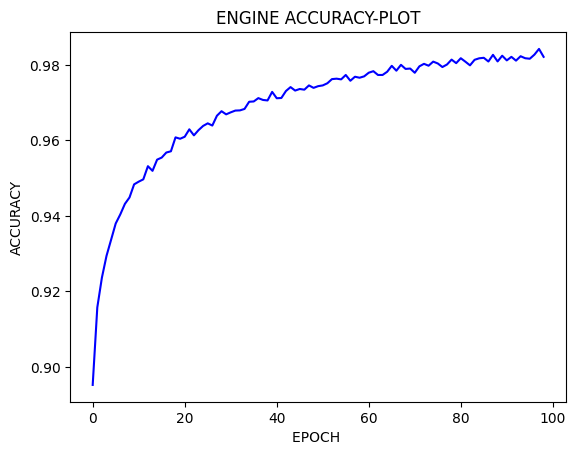

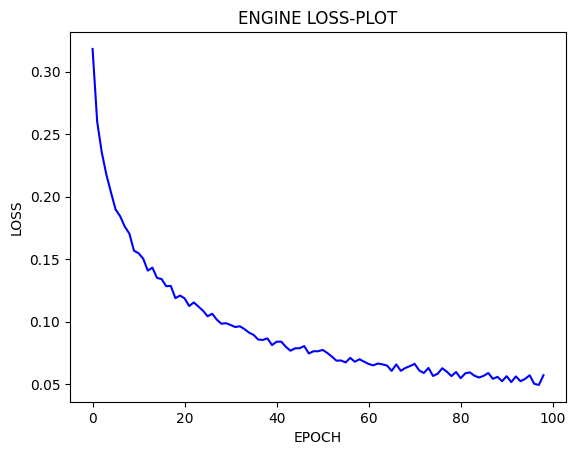

In [ ]:


print(history.history.keys())


plt.plot(history.history['accuracy'],color='blue')
plt.title('ENGINE ACCURACY-PLOT')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH ')
plt.show()


plt.plot(history.history['loss'],color='blue')
plt.title('ENGINE LOSS-PLOT')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.show()


In [ ]:

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Mnist Digit Recogination/model(resnet50).hdf5')

# Make predictions on the test data
predictions = model.predict(x_test_preprocessed)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Print some example predictions
for i in range(10):
    print("Predicted:", predicted_labels[i])
    print("Actual:", y_test[i])
    print()

313/313 [==============================] - 13s 10ms/step


Text(83.22222222222221, 0.5, 'True Labels')

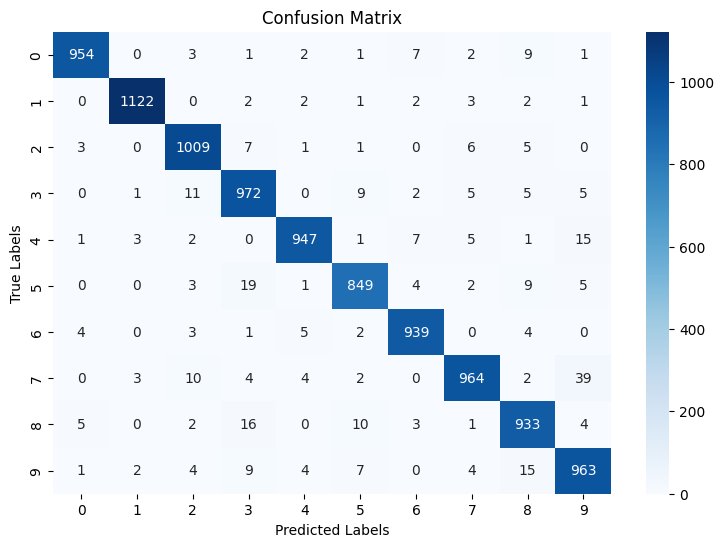

In [3]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
import seaborn as sns
# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Mnist Digit Recogination/model(resnet50).hdf5')  # Adjust the filename and path accordingly




# Generate predictions
y_pred = model.predict(x_test_preprocessed)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix using seaborn
fig=plt.figure(figsize=(9, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
